# Section 1: Introduction to Fraud Detection
### What is Fraud Detection?

- Fraud detection is the process of detecting anomalous financial records from within a broader set of normal transactions.
- The data is typically tabular in nature i.e. data sets with rows and columns
- It is important to have access to histrorical instances of confirmed fraudulent behaviour i.e. labels or our target variable, which are often issued by a bank or third party
- Because fraud is by definition less frequent than normal behaviour within a financial services ecosystem, there will be far less confirmed historical instances of fraudulent behaviour compared with the known good/normal behaviour, leading to an imbalance between the fraudulent and non-fraudulent samples

- Feature engineering is crucial, as it involves converting domain knowledge from fraud analysts and investigators into data that can be used to detect suspicious behaviours
- The features/data is typically aggregated at the customer-level, or at the transaction-level, depending on the use-case. Some approaches even combine the two
- Network data i.e. how users within a system are connected to one another (if at all), is normally a strong indicator of fraudulent behaviour

- Data sets for fraud detection are notoriously difficulty to access, due to various issues related to data privacy. There are some popular data sets available online, one of which is the ULB Machine Learning Group credit card fraud data set on Kaggle that we'll be using throughout this project

### Exploring the Credit Card Fraud Data Set

- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
# Import the os module, which provides a way to interact with the operating system.
import os
# Import the numpy library and alias it as np for convenience.
import numpy as np
# Import the pandas library and alias it as pd for convenience.
import pandas as pd

In [2]:
# Import the required libraries for visualization.
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define the path to the directory where the 'creditcard.csv' file is located.
path = r'C:\.............\fraud_project'
# Change the current working directory to the specified path.
os.chdir(path)

In [4]:
# Read the 'creditcard.csv' file into a pandas DataFrame and store it in the variable 'df'.
df = pd.read_csv('credit_card.csv')

In [5]:
# Display the first few rows of the DataFrame to get a quick overview of the data.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Generate summary statistics of the DataFrame's numerical columns.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


###  Managing Labels in a Fraud Detection context

In [7]:
# Count the occurrences of each unique value in the 'Class' column.
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

- Training algorithm would be overwhelmingly baised towards the majority class
- Would not be able to learn anything meaningful from the fraudulent minority class
- we can cater for the imbalance in a number of ways
    - Up sample the minority class at training time (synthetic data)
    - Down sample the majority class
    - Choose an approach better suited to highly imbalanced data i.e. anomaly detection algorithms
    - Re-balance the classes at training time using the algorithm's class_weight hyperparameter to penalize the loss function more for misclassifications made on the minority class (hence improving the algorithm's ability to learn the minority class)

- In machine learning, there are traditionally two main types of modelling approaches:
    - Supervised learning (data has a label or target variable i.e. something to learning and correct itself from)
        - Classification - predicting a categorical value i.e. is fraud yes/no
        - Regression - predicting a continuous value i.e. price
    - Unsupervised (data has no label)
        - Clustering - find the natural groupings within the data
        - Dimensionality reduction - reduce higher dimensional data set down to a lower dimensional space i.e. many columns down to fewer columns to potentially help improve model performance
- Fraud detection is typically a supervised, binary classification problem, but unsupervised learning (both clustering and PCA) can be used
- This data set represents a supervised learning problem (binary (yes/no) classification)

In [8]:
# Assign the 'Class' column to the variable 'y'.
y = df['Class']

# Assign all columns except 'Class', 'Amount', and 'Time' to the variable 'X'.
X = df.drop(['Class', 'Amount', 'Time'], axis=1)

### Model validation
- Train set which our model learns from
- Test set (unseen holdout set) which is used to evaluate the effectiveness of the model after training is complete
- Often a 80/20 or 90/10 split depending on the amount of data

In [9]:
# Import the train_test_split function from the sklearn.model_selection module.
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets. 
# X_train will contain the features for training, X_test for testing, y_train the corresponding labels for training, and y_test for testing.
# The test set will be 10% of the total data, and the random_state is set to 42 for reproducibility.
# The stratify parameter ensures that the class distribution in the train and test sets is similar to the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Print the shapes of the training and testing sets for both features and labels.
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (256326, 28)
X_test: (28481, 28)
y_train: (256326,)
y_test: (28481,)


In [10]:
# 'X_train' contains the features for training the machine learning model.
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
169217,-0.204054,0.773672,-0.508138,-0.504530,1.110237,-0.889531,0.892855,-0.129737,0.067865,-0.706473,...,-0.157602,-0.045248,-0.354026,-0.841090,0.345082,0.463542,-0.357763,0.117770,0.124158,0.049966
127577,1.185899,-0.777605,0.290538,-0.507296,-0.883708,-0.444648,-0.380721,-0.136399,-0.734164,0.441292,...,0.425192,0.249048,0.100304,0.176216,-0.087076,0.117514,0.455406,-0.235654,0.009948,0.026970
155900,0.337897,-0.400062,1.397225,-0.601374,-1.432251,-0.115443,-0.791959,-0.113610,-0.818184,1.161987,...,2.266210,-0.067891,-0.200381,0.177004,0.015208,-0.096025,-0.729801,0.219861,0.203869,0.166661
274954,2.035125,-0.389804,-2.551903,-0.722794,2.380486,3.320923,-0.468416,0.789462,0.402422,0.089469,...,0.020289,-0.138523,-0.288467,-0.839066,0.374619,0.698594,-0.267765,0.218413,-0.053658,-0.065533
250973,1.994644,-0.343013,-0.516240,0.339995,-0.353679,-0.100897,-0.572387,-0.009577,1.255657,-0.167218,...,-0.344320,-0.140784,0.280918,1.054895,0.089021,0.657755,0.014361,-0.165380,0.039714,-0.031416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85418,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,0.108640,...,-1.241768,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178
29062,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,-0.131553,...,-0.500426,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886
13766,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,-0.268878,...,0.278512,-0.093783,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887
17677,-0.598120,0.775041,1.823394,0.312991,-0.096171,-0.391452,0.499351,0.071224,-0.017496,-0.512312,...,-0.238137,0.102259,0.060615,0.568083,-0.084001,0.685003,-0.245859,0.356638,0.378580,0.206366


In [11]:
# Print the number of fraud cases in the training set.
print("Fraud in y_train:", len(np.where(y_train == 1)[0]))

# Print the number of fraud cases in the test set.
print("Fraud in y_test", len(np.where(y_test == 1)[0]))

Fraud in y_train: 443
Fraud in y_test 49


# Section 2: Training a Supervised Learning Model
### Training a Baseline Logistic Regression Model using scikit-learn

In [12]:
# Import the LogisticRegression class from the sklearn.linear_model module.
from sklearn.linear_model import LogisticRegression

# Initialize a Logistic Regression model.
model = LogisticRegression()

# Train the model using the training data (features and labels).
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Use the trained model to make predictions on the test set features.
y_pred = model.predict(X_test)

# Display the predicted values.
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Introducing the Confusion Matrix
- Acts as a cross section between the ground truth and the predictions that the trained model makes
- In a binary classification context, the confusion matrix reports on the classification performance of the model:
    - True negatives - actually non-fraudulent and correctly classified as non-fraudulent
    - False positives - actually non-fraudulent but incorrectly classified as fraud
    - False negatives - actually fraud but incorrectly classified as being non-fraudulent
    - True positives - actually fraud and correctly classified as fraud
- We're trying to detect fraud, so the "positive" relates to fraud while "negative" refers to non-fraudulent.
- "True" relates to correct predictions, whereas "false" refers to incorrect predictions.
- Many performance metrics are derived from the elements of the confusion matrix, therefore it is foundational for understanding how to measure performance for classification problems.

In [14]:
# Import the confusion_matrix function from the sklearn.metrics module.
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix using the actual labels (y_test) and the predicted labels (y_pred).
confusion_matrix(y_test, y_pred)

array([[28426,     6],
       [   15,    34]], dtype=int64)

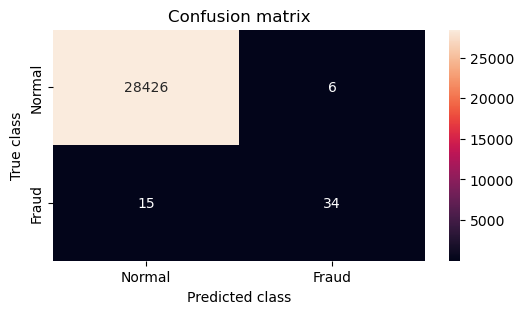

In [15]:
# Define labels for the classes.
LABELS = ["Normal", "Fraud"]

# Calculate the confusion matrix.
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a new figure with a specific size.
plt.figure(figsize=(6, 3))

# Generate a heatmap for the confusion matrix.
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")

# Set the title of the plot.
plt.title("Confusion matrix")

# Set the label for the y-axis.
plt.ylabel('True class')

# Set the label for the x-axis.
plt.xlabel('Predicted class')

# Display the plot.
plt.show()

### Improving the Logistic Regression Model through Hyperparameter Selection

In [16]:
# Create an instance of the LogisticRegression model with class weights balanced.
model = LogisticRegression(class_weight='balanced')

# Train the model on the training data (X_train) and corresponding labels (y_train).
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [17]:
# Use the trained model to make predictions on the test data.
y_pred = model.predict(X_test)

# Display the predicted labels.
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
# Generate a confusion matrix to evaluate the model's performance on the test data.
confusion_matrix(y_test, y_pred)

array([[27657,   775],
       [    4,    45]], dtype=int64)

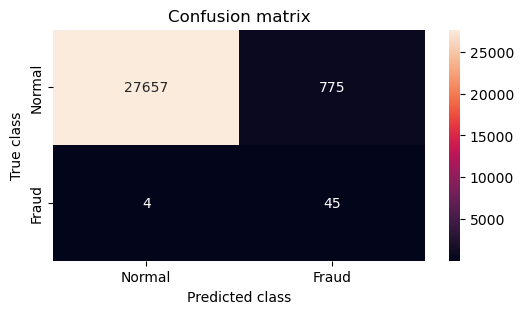

In [19]:
# Define the labels for the classes (Normal and Fraud).
LABELS = ["Normal", "Fraud"]

# Generate a confusion matrix to evaluate the model's performance on the test data.
conf_matrix = confusion_matrix(y_test, y_pred)

# Set up the visualization parameters.
plt.figure(figsize=(6, 3))

# Create a heatmap to visualize the confusion matrix.
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")

# Add a title to the plot.
plt.title("Confusion matrix")

# Add labels to the y-axis and x-axis.
plt.ylabel('True class')
plt.xlabel('Predicted class')

# Display the plot.
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']  # Only l2 penalty is supported by lbfgs solver
}

# Create an instance of the LogisticRegression model
model = LogisticRegression(class_weight='balanced', solver='lbfgs')

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Perform the grid search on your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model to make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}


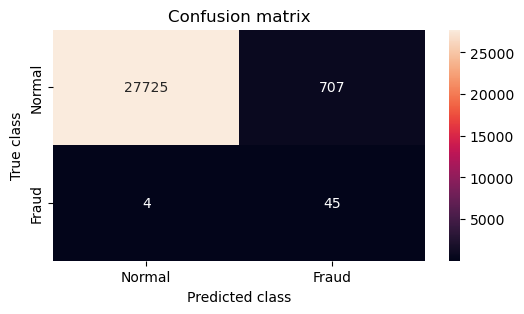

In [21]:
# Add the visualization code for the confusion matrix
# Define labels for the classes.
LABELS = ["Normal", "Fraud"]

# Calculate the confusion matrix.
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a new figure with a specific size.
plt.figure(figsize=(6, 3))

# Generate a heatmap for the confusion matrix.
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")

# Set the title of the plot.
plt.title("Confusion matrix")

# Set the label for the y-axis.
plt.ylabel('True class')

# Set the label for the x-axis.
plt.xlabel('Predicted class')

# Display the plot.
plt.show()

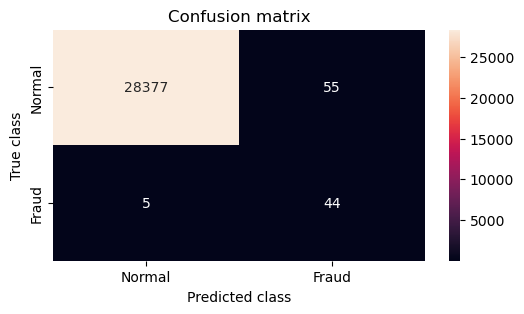

In [22]:
# Set class weights to handle class imbalance (1:50 ratio of class 0 to class 1).
model = LogisticRegression(class_weight={0: 1, 1: 50})

# Train the logistic regression model using the weighted classes.
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set features.
y_pred = model.predict(X_test)

# Define labels for the classes.
LABELS = ["Normal", "Fraud"]

# Calculate the confusion matrix.
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a new figure with a specific size.
plt.figure(figsize=(6, 3))

# Generate a heatmap for the confusion matrix.
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")

# Set the title of the plot.
plt.title("Confusion matrix")

# Set the label for the y-axis.
plt.ylabel('True class')

# Set the label for the x-axis.
plt.xlabel('Predicted class')

# Display the plot.
plt.show()

### Interpreting the Logistic Regression Model

In [23]:
# Retrieve the unique classes that the model can predict.
model.classes_

array([0, 1], dtype=int64)

In [24]:
# Retrieve the coefficients associated with each feature in the logistic regression equation.
# y = mx + c
# B_0 + B_1*x_1 + B_2*x_2 etc 

model.coef_

array([[ 0.11077592, -0.06859069, -0.01967696,  0.88409344,  0.09144915,
        -0.18473897,  0.05203225, -0.36027874, -0.1543006 , -0.61276151,
         0.23644341, -0.58795584, -0.39928999, -0.67522941, -0.11132962,
        -0.42065113, -0.09667066, -0.03722182, -0.09650186, -0.12984166,
         0.29407768,  0.52342799, -0.18790098,  0.00292142,  0.00887645,
        -0.42029811, -0.13369595,  0.03408903]])

In [25]:
# Retrieve the intercept term (B_0) in the logistic regression equation.
model.intercept_

array([-5.61540575])

In [26]:
# Predict the probabilities for each class using the logistic regression model.
model.predict_proba(X_test)

# true probabilities would require model calibration isotonic regression etc
# https://scikit-learn.org/stable/modules/calibration.html

array([[0.98667522, 0.01332478],
       [0.99558961, 0.00441039],
       [0.99587779, 0.00412221],
       ...,
       [0.99220802, 0.00779198],
       [0.99792357, 0.00207643],
       [0.994318  , 0.005682  ]])

### SHAP
- The Shapley value is the average expected marginal contribution of one feature after all possible feature combinations have been considered. 
- Shapley value helps to determine a payoff for all of the features when each feature might have contributed more or less than the others.

In [27]:
# Initialize the SHAP library for JavaScript visualization.
import shap
shap.initjs()

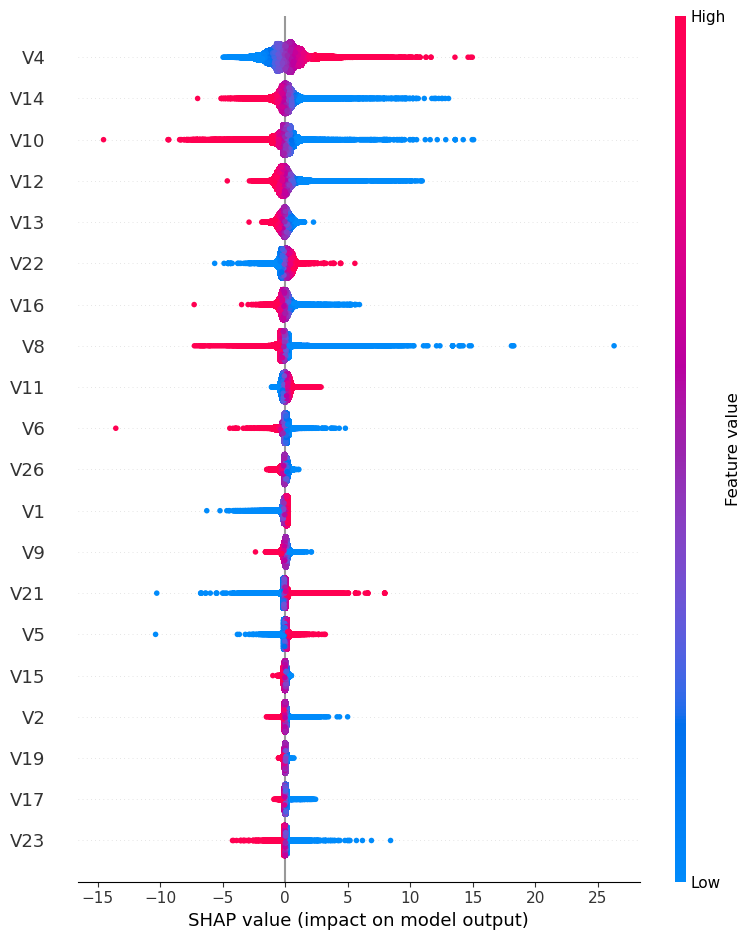

In [28]:
# Create a LinearExplainer object to explain the model's predictions.
explainer = shap.LinearExplainer(model, X_train)

# Calculate SHAP values for the entire dataset.
shap_values = explainer.shap_values(X)

# Generate a summary plot to visualize the SHAP values.
shap.summary_plot(shap_values, X)

### Training an XGBoost Model

In [29]:
# XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. 
# Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target 
# variable by combining the estimates of a set of simpler, weaker models.

# Import the XGBoost library and alias it as xgb for convenience.
import xgboost as xgb

# Initialize an XGBoost Classifier model.
model = xgb.XGBClassifier()

# Train the model using the training data.
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
# Use the trained XGBoost model to make predictions on the test set features.
y_pred = model.predict(X_test)

In [31]:
# Calculate the confusion matrix using the actual labels (y_test) and the predicted labels (y_pred).
confusion_matrix(y_test, y_pred)

array([[28430,     2],
       [    8,    41]], dtype=int64)

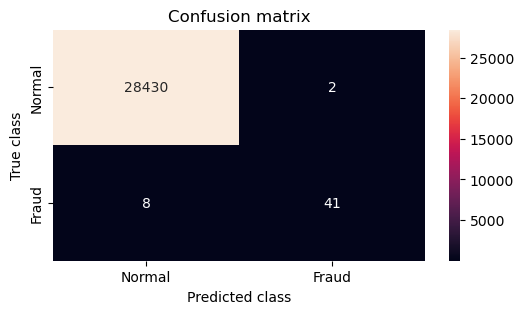

In [32]:
# Define labels for the classes.
LABELS = ["Normal", "Fraud"]

# Calculate the confusion matrix.
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a new figure with a specific size.
plt.figure(figsize=(6, 3))

# Generate a heatmap for the confusion matrix.
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")

# Set the title of the plot.
plt.title("Confusion matrix")

# Set the label for the y-axis.
plt.ylabel('True class')

# Set the label for the x-axis.
plt.xlabel('Predicted class')

# Display the plot.
plt.show()

### Improving the XGBoost Model through Hyperparameter Selection

In [33]:
from sklearn.model_selection import GridSearchCV

# Define a range of values for max_depth and scale_pos_weight to search over
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'scale_pos_weight': [10, 50, 100, 200]
}

# Initialize an XGBoost Classifier model
model = xgb.XGBClassifier()

# Initialize a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_max_depth = grid_search.best_params_['max_depth']
best_scale_pos_weight = grid_search.best_params_['scale_pos_weight']

# Initialize a new XGBoost Classifier model with the best hyperparameters
best_model = xgb.XGBClassifier(max_depth=best_max_depth, scale_pos_weight=best_scale_pos_weight)

# Train the model using the training data
best_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set features
y_pred = best_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[[28429     3]
 [    8    41]]


In [34]:
# After the grid search is complete
best_max_depth = grid_search.best_params_['max_depth']
best_scale_pos_weight = grid_search.best_params_['scale_pos_weight']

print(f"Best max_depth: {best_max_depth}")
print(f"Best scale_pos_weight: {best_scale_pos_weight}")

Best max_depth: 6
Best scale_pos_weight: 10


In [35]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_depth': [3, 4, 5, 6],
    'scale_pos_weight': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300]
}

random_search = RandomizedSearchCV(xgb.XGBClassifier(), param_distributions=param_dist, 
                                   scoring='accuracy', cv=3, verbose=2, n_jobs=-1, 
                                   n_iter=10)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [36]:
# Train the model using the training data
best_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set features
y_pred = best_model.predict(X_test)

# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(conf_matrix)


[[28429     3]
 [    7    42]]


_**Based on this, it appears that the hyperparameter tuning did not lead to a noticeable improvement in model performance**_

### Interpreting the XGBoost Model

In [37]:
# Initialize an XGBoost Classifier model with specified hyperparameters.
model = xgb.XGBClassifier() 

# Train the model using the training data.
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
# Retrieve the unique classes that the model can predict.
model.classes_

array([0, 1])

In [39]:
# Retrieve the feature importances from the XGBoost model.
model.feature_importances_

array([0.01434672, 0.01372506, 0.01505462, 0.0305202 , 0.01062508,
       0.01463888, 0.03894384, 0.01785345, 0.01561813, 0.2576994 ,
       0.01070768, 0.05817017, 0.0133881 , 0.2847301 , 0.01321378,
       0.01364749, 0.02879896, 0.01371637, 0.01001026, 0.01412168,
       0.01330267, 0.0108841 , 0.0083514 , 0.01114006, 0.00975545,
       0.01327308, 0.02413085, 0.0196324 ], dtype=float32)

# Section 3: Performance Metrics for Fraud Detection
### Understanding the Cost of Misclassification
#### Testing the 1st XGBoost model (without hyperparameter tuning)

In [40]:
# Loading the dataset
df = pd.read_csv('credit_card.csv')

# Separating target and features
y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

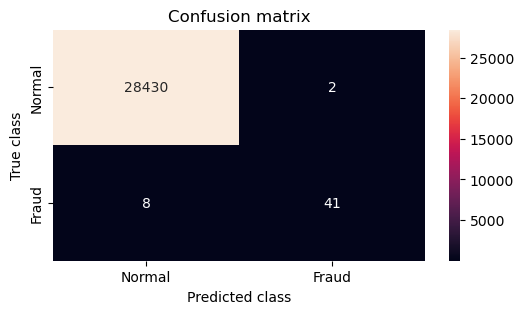

In [41]:
# Creating an XGBoost classifier model
model_xgb = xgb.XGBClassifier()

# Training the XGBoost model
model_xgb.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_xgb.predict(X_test)

# Defining labels for confusion matrix
LABELS = ["Normal", "Fraud"]

# Generating and displaying confusion matrix for XGBoost model
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix_xgb, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [42]:
# Accessing individual elements of confusion matrix
print(conf_matrix_xgb[0][0])
print(conf_matrix_xgb[0][1])
print(conf_matrix_xgb[1][0])
print(conf_matrix_xgb[1][1])

28430
2
8
41


In [43]:
# Assigning costs to different classification outcomes
cost_tn = 1
cost_fp = 10
cost_fn = 100
cost_tp = 1

In [44]:
# Calculating total cost of fraud for XGBoost model
total_cost_of_fraud_xgb_1 = (conf_matrix_xgb[0][0] * cost_tn) + (conf_matrix_xgb[0][1] * cost_fp) + (conf_matrix_xgb[1][0] * cost_fn) + (conf_matrix_xgb[1][1] * cost_tp)
total_cost_of_fraud_xgb_1

29291

#### Testing the 2nd XGBoost model (with hyperparameter tuning)

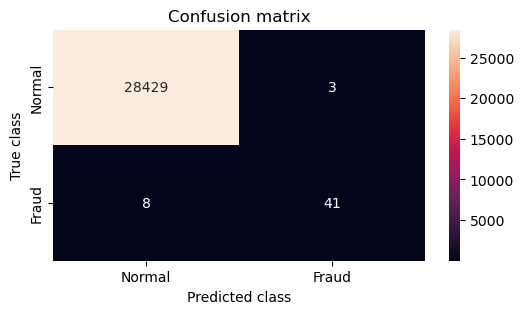

In [45]:
# Creating an XGBoost classifier model
model_xgb = xgb.XGBClassifier(max_depth=best_max_depth, scale_pos_weight=best_scale_pos_weight)

# Training the XGBoost model
model_xgb.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_xgb.predict(X_test)

# Defining labels for confusion matrix
LABELS = ["Normal", "Fraud"]

# Generating and displaying confusion matrix for XGBoost model
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix_xgb, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [46]:
# Calculating total cost of fraud for XGBoost model
total_cost_of_fraud_xgb_2 = (conf_matrix_xgb[0][0] * cost_tn) + (conf_matrix_xgb[0][1] * cost_fp) + (conf_matrix_xgb[1][0] * cost_fn) + (conf_matrix_xgb[1][1] * cost_tp)
total_cost_of_fraud_xgb_2

29300

#### Testing the 1st Logistic model (without hyperparameter tuning)

In [47]:
# Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Creating a Logistic Regression model
model_lr = LogisticRegression()

# Training the Logistic Regression model
model_lr.fit(X_train, y_train)

# Making predictions on the test set using Logistic Regression model
y_pred = model_lr.predict(X_test)

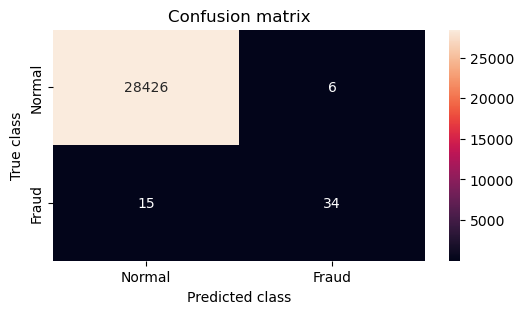

In [48]:
# Generating and displaying confusion matrix for Logistic Regression model
conf_matrix_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix_lr, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [49]:
# Calculating total cost of fraud for Logistic Regression model
total_cost_of_fraud_lr_1 = (conf_matrix_lr[0][0] * cost_tn) + (conf_matrix_lr[0][1] * cost_fp) + (conf_matrix_lr[1][0] * cost_fn) + (conf_matrix_lr[1][1] * cost_tp)
total_cost_of_fraud_lr_1

30020

#### Testing the 2nd Logistic model (without hyperparameter tuning)

In [50]:
# Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Creating a Logistic Regression model
model_lr = LogisticRegression(class_weight={0: 1, 1: 50})

# Training the Logistic Regression model
model_lr.fit(X_train, y_train)

# Making predictions on the test set using Logistic Regression model
y_pred = model_lr.predict(X_test)

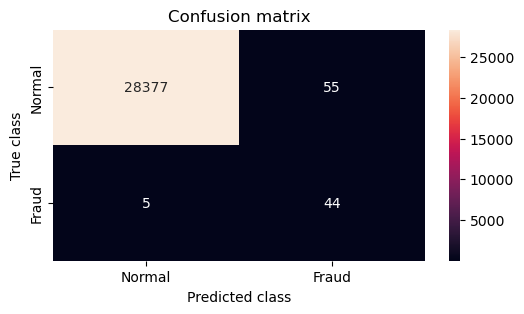

In [51]:
# Generating and displaying confusion matrix for Logistic Regression model
conf_matrix_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix_lr, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [52]:
# Calculating total cost of fraud for Logistic Regression model
total_cost_of_fraud_lr_2 = (conf_matrix_lr[0][0] * cost_tn) + (conf_matrix_lr[0][1] * cost_fp) + (conf_matrix_lr[1][0] * cost_fn) + (conf_matrix_lr[1][1] * cost_tp)
total_cost_of_fraud_lr_2

29471

In [53]:
# Creating a DataFrame to store the costs of misclassification for different models
model_cost = pd.DataFrame(index=['1st XGBoost model','2st XGBoost model','1st Logistic model','2nd Logistic model'],\
                         data=[total_cost_of_fraud_xgb_1,total_cost_of_fraud_xgb_2,total_cost_of_fraud_lr_1,\
                               total_cost_of_fraud_lr_2], columns=['Cost of Misclassification'])

# Sorting the DataFrame by 'Cost of Misclassification' column
model_cost.sort_values(by='Cost of Misclassification')

,Cost of Misclassification
1st XGBoost model,29291
2st XGBoost model,29300
2nd Logistic model,29471
1st Logistic model,30020


### Implementing Performance Metrics in scikit-learn

In [54]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[28430,     2],
       [    8,    41]], dtype=int64)

In [55]:
from sklearn.metrics import (classification_report, precision_score, recall_score,
                             average_precision_score, roc_auc_score,
                             f1_score, matthews_corrcoef)                        

In [56]:
# Precision is the proportion of correctly predicted fraudulent instances among all instances predicted as fraud
# TP / TP + FP
precision_score(y_test, y_pred)

0.9534883720930233

In [57]:
# Recall is the proportion of the fraudulent instances that are successfully predicted
# TP / TP + FN
recall_score(y_test, y_pred)

0.8367346938775511

In [58]:
# F1-score is the harmonic balance of precision and recall (can be weighted more towards P or R if need be)
# F = 2 * (Precision * Recall)/(Precision + Recall)
f1_score(y_test, y_pred)

0.8913043478260869

In [59]:
# AUROC/AUC = Area under the Receiver Operating Characteristic curve
# plot the TPR (Recall) and FPR at various classification thresholds
# FPR = FP / FP + TN
# Good measure of overall performance

roc_auc_score(y_test, y_pred)

0.9183321753011842

In [60]:
# AUPRC = Area under the Precision-Recall curve
# Better alternative to AUC as doesn't include TN which influences the scores significantly in highly imbalanced data
# calculates the area under the curve at various classification thresholds

average_precision_score(y_test, y_pred)

0.7980976901527888

In [61]:
# Classification report summarizes the classification metrics at the class and overall level

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.95      0.84      0.89        49

    accuracy                           1.00     28481
   macro avg       0.98      0.92      0.95     28481
weighted avg       1.00      1.00      1.00     28481



### Summary

In this analysis, we explored the use of performance metrics for fraud detection. We began by implementing an XGBoost model and assessed its classification performance using a confusion matrix. We then demonstrated how to access specific elements within the confusion matrix.

Following this, we assigned hypothetical costs to different classification outcomes, including true positives, true negatives, false positives, and false negatives. These costs were utilized to quantify the operational impact of misclassifications.

We also emphasized the importance of comprehending the real-world consequences of misclassifications, encompassing potential financial costs and potential impacts on customer experience. It was underscored that these costs should be determined in collaboration with relevant stakeholders possessing a deep understanding of operational processes.

Subsequently, we calculated the total cost of fraud for each model and obtained the following results:

- 1st XGBoost model: 29,291
- 2nd XGBoost model: 29,300
- 2nd Logistic model: 29,471
- 1st Logistic model: 30,020

Finally, we compared the total cost of fraud between the models. The XGBoost model was found to have a slightly lower operational cost, suggesting it may be a more favorable choice for fraud detection in this context.

Overall, this analysis underscores the significance of considering the practical implications of model performance and provides a framework for quantifying the costs associated with misclassifications in fraud detection.

# Section 4: Optimal Model Selection
### Threshold Optimization using Performance Metrics

In [62]:
# Loading the dataset
df = pd.read_csv('credit_card.csv')

# Separating target and features
y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [63]:
# Creating an XGBoost classifier model
model_xgb = xgb.XGBClassifier()

# Training the XGBoost model
model_xgb.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_xgb.predict(X_test)

# Show the confusion matrix
confusion_matrix(y_test, y_pred)

array([[28430,     2],
       [    8,    41]], dtype=int64)

In [64]:
# probability of being fraudulent
y_pred = model_xgb.predict_proba(X_test)[:,1]
y_pred

array([8.6430356e-07, 8.4617031e-06, 6.4940872e-07, ..., 4.9858716e-07,
       5.6409237e-07, 9.1388034e-07], dtype=float32)

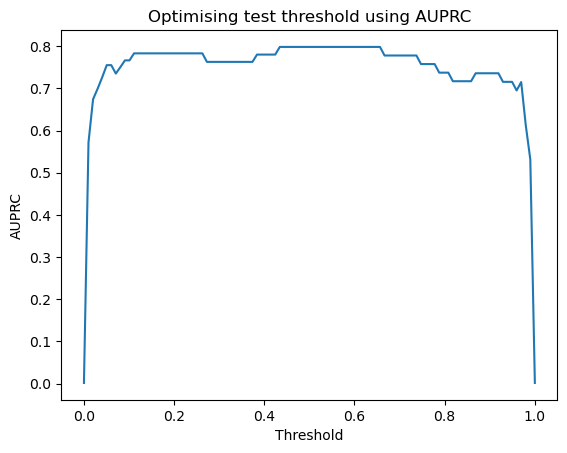

In [65]:
import numpy as np
from sklearn.metrics import average_precision_score

# Initialize lists to store threshold values and AUPRC scores
threshold_list = []
auprc_list = []

# Generate a range of thresholds
thresholds = np.linspace(0, 1, 100)

# Loop through each threshold value
for threshold in thresholds:
    # Generate binary predictions based on threshold
    y_pred_thresh = [1 if e > threshold else 0 for e in y_pred]
    threshold_list.append(threshold)
    
    # Calculate AUPRC score for the current threshold
    auprc_score = average_precision_score(y_test, y_pred_thresh)
    auprc_list.append(auprc_score)

# Create a DataFrame to hold AUPRC scores and their corresponding thresholds
threshold_df = pd.DataFrame(threshold_list, auprc_list).reset_index()
threshold_df.columns = ['AUPRC', 'Threshold']

# Plot AUPRC scores against thresholds
plt.plot(threshold_df['Threshold'], threshold_df['AUPRC'])
plt.title("Optimising test threshold using AUPRC")
plt.xlabel('Threshold')
plt.ylabel('AUPRC')

# Save the plot as an image file
plt.savefig('Optimising threshold using AUPRC')

# Display the plot
plt.show()

In [66]:
# Sort threshold_df by AUPRC in descending order
threshold_df.sort_values(by='AUPRC', ascending=False)

,AUPRC,Threshold
50,0.798098,0.505051
43,0.798098,0.434343
45,0.798098,0.454545
46,0.798098,0.464646
47,0.798098,0.474747
...,...,...
97,0.612912,0.979798
1,0.571948,0.010101
98,0.531420,0.989899
0,0.001720,0.000000


In [67]:
# Filter threshold_df for rows where AUPRC is greater than or equal to 0.79
threshold_df.loc[(threshold_df['AUPRC'] >= 0.79)]

,AUPRC,Threshold
43,0.798098,0.434343
44,0.798098,0.444444
45,0.798098,0.454545
46,0.798098,0.464646
47,0.798098,0.474747
48,0.798098,0.484848
49,0.798098,0.494949
50,0.798098,0.505051
51,0.798098,0.515152
52,0.798098,0.525253


In this section, we delved into optimal model selection through threshold optimization using performance metrics. We began by emphasizing the crucial role of setting thresholds in classification models. This process entails simulating various thresholds and assessing model performance with metrics like AUPRC. We underscored the importance of visualizing results for effective threshold selection.

# Section 5: Strategies for Improving Model Performance
### Plotting the data 

Upon prior examination, it's evident that there's a notable discrepancy between fraudulent and non-fraudulent cases. We'll address this by re-sampling our data. We'll visually assess the ratio of fraud to non-fraud cases in the dataset. Let's create a plot to illustrate the ratio between fraudulent and non-fraudulent data points.
The provided code defines two functions, 'prep_data' and 'plot_data', which are used to prepare the data and visualize it, respectively. The 'prep_data' function extracts the features and labels from the dataset 'df' and returns them as numpy arrays. The 'plot_data' function creates a scatter plot to visualize the distribution of the two classes.

In [68]:
# Function to prepare data for modeling
def prep_data(df):
    # Extract features (columns 1 to 29)
    X = df.iloc[:, 1:29]
    # Convert features to numpy array and ensure they are of type float
    X = np.array(X).astype(float)
    # Extract labels (column 30)
    y = df.iloc[:, 30]
    # Convert labels to numpy array and ensure they are of type float
    y = np.array(y).astype(float)
    # Return features and labels
    return X, y

In [69]:
# Function to plot data points
def plot_data(X, y):
    # Scatter plot for Class 0
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    # Scatter plot for Class 1
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    # Add legend
    plt.legend()
    # Display the plot
    return plt.show()

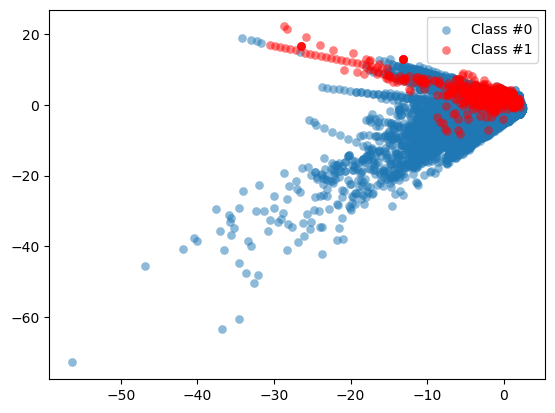

In [70]:
# Create features (X) and labels (y) using prep_data function
X, y = prep_data(df)

# Plot the data using plot_data function with features (X) and labels (y)
plot_data(X, y)

### Applying SMOTE
Now we are going to re-balance the data using the Synthetic Minority Over-sampling Technique (SMOTE). Unlike ROS, SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying observations, so let's apply SMOTE to our credit card data.

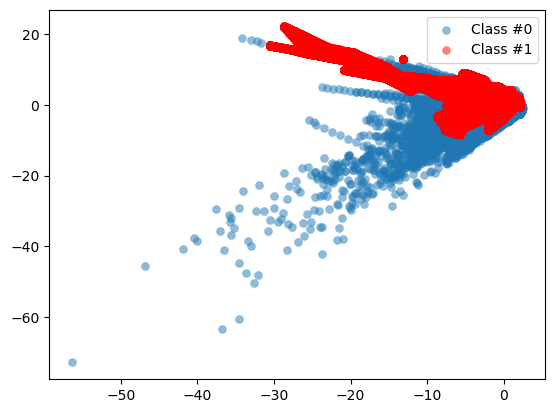

In [71]:
from imblearn.over_sampling import SMOTE

# Run the prep_data function
X, y = prep_data(df)

# Define the resampling method
method = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

### Compare SMOTE to original data
We can see that using SMOTE suddenly gives us more observations of the minority class. Let's compare those results to our original data, to get a good feeling for what has actually happened. Let's have a look at the value counts again of our old and new data, and let's plot the two scatter plots of the data side by side. We'll use the the function compare_plot() for that, which takes the following arguments: X, y, X_resampled, y_resampled, method=''. The function plots our original data in a scatter plot, along with the resampled side by side.

In [72]:
def compare_plot(X,y,X_resampled,y_resampled, method):
    # Start a plot figure
    f, (ax1, ax2) = plt.subplots(1, 2)
    # sub-plot number 1, this is our normal data
    c0 = ax1.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",alpha=0.5)
    c1 = ax1.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",alpha=0.5, c='r')
    ax1.set_title('Original set')
    # sub-plot number 2, this is our oversampled data
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=.5,c='r')
    ax2.set_title(method)
    # some settings and ready to go
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
                  ncol=2, labelspacing=0.)
    #plt.tight_layout(pad=3)
    return plt.show()

0.0    284315
1.0       492
Name: count, dtype: int64
0.0    284315
1.0    284315
Name: count, dtype: int64


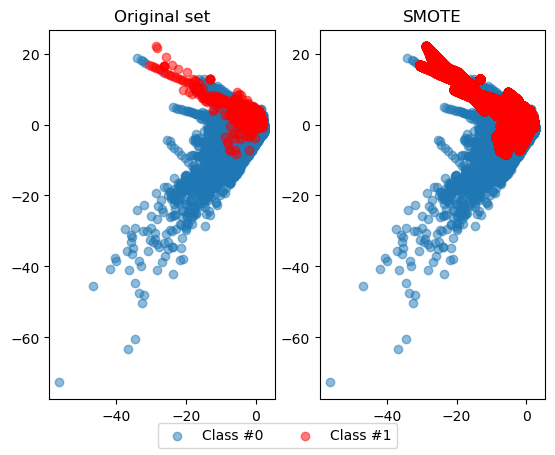

In [73]:
# Print the value_counts on the original labels y
print(pd.Series(y).value_counts())

# Print the value_counts
print(pd.Series(y_resampled).value_counts())

# Run compare_plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

### Up-sampling the Minority Class with SMOTE

In [74]:
df = pd.read_csv('credit_card.csv')
y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[28430,     2],
       [    8,    41]], dtype=int64)

In [75]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(sampling_strategy=1, random_state=42, k_neighbors=5)
# sampling_strategy = ratio of minority to majority after resampling
# k_neighbors = defines neighborhood of samples to use to generate synthetic samples. Decrease to reduce false positives.
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 255883, 1: 443})
Resampled dataset shape Counter({0: 255883, 1: 255883})


In [76]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_res, y_res)
y_pred = model_xgb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[28416,    16],
       [    7,    42]], dtype=int64)

### Summary
In this section, we focus on up-sampling the minority class using SMOTE.

After retraining our XGBoost classifier, we identified 41 instances of fraud, with 2 false positives and 8 cases of missed fraud.

Given the highly imbalanced dataset, SMOTE is employed to generate synthetic fraudulent instances, improving model performance.

Using the imbalanced-learn library, we implement SMOTE. The sampling strategy is set to 1, ensuring a 1-to-1 ratio of minority to majority class after upsampling.

The K nearest neighbors parameter, initially set to 5, controls the neighborhood for generating synthetic samples. Adjusting this can reduce false positives.

After fitting the resampling, we retrain the model. The resulting confusion matrix shows:
- _Detected Fraudulent Cases: 42_
- _False Positives: Increased_

While the additional fraud detection is valuable, it comes with a potential rise in false positives. Balancing this trade-off is essential. A cost-based approach can help evaluate the impact on resources.

Overall, SMOTE offers a powerful tool for addressing class imbalance and improving model performance.